#Exploratory Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.metrics import roc_curve, auc

In [5]:
dataset = pd.read_csv('mtsamples.csv')
dataset.drop(dataset.columns[[0]],axis=1)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [6]:
dataset.head(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [7]:

print(len(dataset))

4999


In [8]:
dataset['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [9]:
len(dataset['medical_specialty'].unique())

40

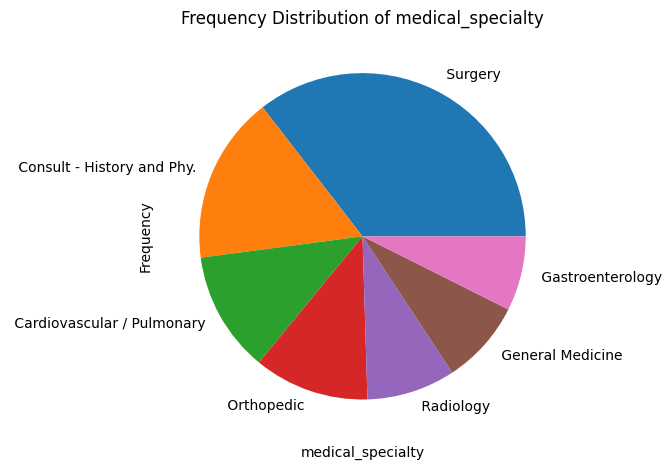

In [10]:
freq_table = dataset['medical_specialty'].value_counts().nlargest(7)

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

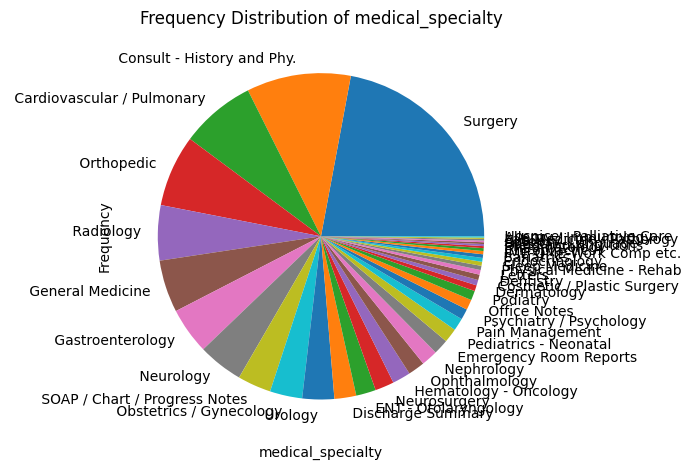

In [11]:
freq_table = dataset['medical_specialty'].value_counts()

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [12]:
#df_keepkeywords for all the rows in the datset
df_keepkeywords_all = dataset.drop(dataset.columns[[0, 1, 3,4]], axis=1)
df_keepkeywords_all

,medical_specialty,keywords
0,Allergy / Immunology,"allergy / immunology, allergic rhinitis, aller..."
1,Bariatrics,"bariatrics, laparoscopic gastric bypass, weigh..."
2,Bariatrics,"bariatrics, laparoscopic gastric bypass, heart..."
3,Cardiovascular / Pulmonary,"cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,Cardiovascular / Pulmonary,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...
4994,Allergy / Immunology,NaN
4995,Allergy / Immunology,"allergy / immunology, mucous membranes, conjun..."
4996,Allergy / Immunology,NaN
4997,Allergy / Immunology,NaN


In [13]:

# Get the column to shift
col_to_shift = df_keepkeywords_all['medical_specialty']
# Drop the column from its current position
df_keepkeywords_all = df_keepkeywords_all.drop('medical_specialty', axis=1)
# Insert the column at a new position
new_position = 1  # set the new position of the column
df_keepkeywords_all.insert(new_position, 'medical_specialty', col_to_shift)
df_keepkeywords_all.head(5)

,keywords,medical_specialty
0,"allergy / immunology, allergic rhinitis, aller...",Allergy / Immunology
1,"bariatrics, laparoscopic gastric bypass, weigh...",Bariatrics
2,"bariatrics, laparoscopic gastric bypass, heart...",Bariatrics
3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",Cardiovascular / Pulmonary
4,"cardiovascular / pulmonary, 2-d, doppler, echo...",Cardiovascular / Pulmonary


In [14]:
df_keepkeywords_all.head(5)

,keywords,medical_specialty
0,"allergy / immunology, allergic rhinitis, aller...",Allergy / Immunology
1,"bariatrics, laparoscopic gastric bypass, weigh...",Bariatrics
2,"bariatrics, laparoscopic gastric bypass, heart...",Bariatrics
3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",Cardiovascular / Pulmonary
4,"cardiovascular / pulmonary, 2-d, doppler, echo...",Cardiovascular / Pulmonary


#Check for missing values
 1. Drop rows which contain ```nan``` values
 2. Replace the values in ```medical_specialty``` with values ```8``` and above with ```8```
 * Intuition: Here the value ```8``` represents ```others```

In [15]:
df_keepkeywords_all.isnull().any()
# There are some rows where keyword contained is NaN
#So, dropping the rows which contain Null values in keywords

keywords              True
medical_specialty    False
dtype: bool

In [16]:
df_keepkeywords_all=df_keepkeywords_all.dropna()
df_keepkeywords_all=df_keepkeywords_all.reset_index(drop=True)

In [17]:
df_keepkeywords_all

,keywords,medical_specialty
0,"allergy / immunology, allergic rhinitis, aller...",Allergy / Immunology
1,"bariatrics, laparoscopic gastric bypass, weigh...",Bariatrics
2,"bariatrics, laparoscopic gastric bypass, heart...",Bariatrics
3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",Cardiovascular / Pulmonary
4,"cardiovascular / pulmonary, 2-d, doppler, echo...",Cardiovascular / Pulmonary
...,...,...
3926,"bariatrics, laparoscopic gastric bypass, gastr...",Bariatrics
3927,"bariatrics, jenny craig, medifast, nutrisystem...",Bariatrics
3928,"bariatrics, elective surgical weight loss, sur...",Bariatrics
3929,"allergy / immunology, chronic glossitis, xeros...",Allergy / Immunology


In [18]:


# Get the column with string labels
label_col =  df_keepkeywords_all['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepkeywords_all['medical_specialty'] = label_encoded

In [19]:
# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{' Allergy / Immunology': 0, ' Bariatrics': 1, ' Cardiovascular / Pulmonary': 2, ' Chiropractic': 3, ' Consult - History and Phy.': 4, ' Cosmetic / Plastic Surgery': 5, ' Dentistry': 6, ' Dermatology': 7, ' Diets and Nutritions': 8, ' Discharge Summary': 9, ' ENT - Otolaryngology': 10, ' Emergency Room Reports': 11, ' Endocrinology': 12, ' Gastroenterology': 13, ' General Medicine': 14, ' Hematology - Oncology': 15, ' Hospice - Palliative Care': 16, ' IME-QME-Work Comp etc.': 17, ' Lab Medicine - Pathology': 18, ' Letters': 19, ' Nephrology': 20, ' Neurology': 21, ' Neurosurgery': 22, ' Obstetrics / Gynecology': 23, ' Office Notes': 24, ' Ophthalmology': 25, ' Orthopedic': 26, ' Pain Management': 27, ' Pediatrics - Neonatal': 28, ' Physical Medicine - Rehab': 29, ' Podiatry': 30, ' Psychiatry / Psychology': 31, ' Radiology': 32, ' Rheumatology': 33, ' SOAP / Chart / Progress Notes': 34, ' Sleep Medicine': 35, ' Speech - Language': 36, ' Surgery': 37, ' Urology': 38}


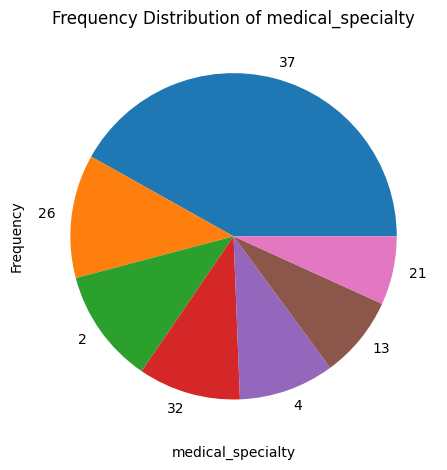

In [20]:
freq_table = df_keepkeywords_all['medical_specialty'].value_counts().nlargest(7)

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The Top 7 medical specialties are:
Here EV stands for encoded value which we get after using the Label Encoder



EV  Medical Specialty    

27 Surgery  

4 Consult- History and Phy.

2 Cardiovascular/ Pulmonary 

14 General Medicine

13 Gastroenterology

21 Neurology

23 Obstetrics/ Gynecology


Replacing the vaues 8 and above in ```medical_specialty``` with 8

In [21]:
df_keepkeywords_all['medical_specialty'] = df_keepkeywords_all['medical_specialty'].apply(lambda x: 8 if x not in [27,4,2,14,13,21,23] else x)

In [22]:


# Get the column with string labels
label_col =  df_keepkeywords_all['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepkeywords_all['medical_specialty'] = label_encoded

In [23]:

# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{2: 0, 4: 1, 8: 2, 13: 3, 14: 4, 21: 5, 23: 6, 27: 7}


So the mapping becomes:
```{2: 0, 4: 1, 8: 2, 13: 3, 14: 4, 21: 5, 23: 6, 27: 7}```

Which means:
```
0- Cardiovascular/ Pulmonary
1- Consult- History and Phy.
2- Others
3- Gastroenterology
4- General Medicine
5- Neurology
6- Obstetrics/ Gynecology
7- Surgery
```

# Checking the composition of the dataset

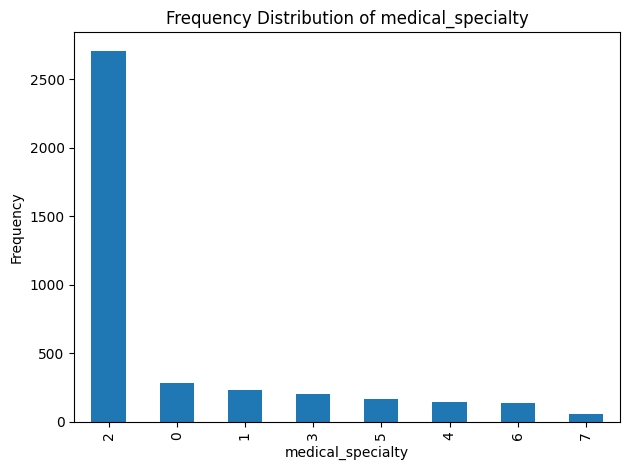

In [24]:
freq_table = df_keepkeywords_all['medical_specialty'].value_counts()

freq_table.plot(kind='bar')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [25]:
df_keepkeywords_all.to_csv('df_keepkeywords_all.csv', index=True)

#Text Cleaning and Preprocessing

In [26]:
df_keepkeywords = pd.read_csv('df_keepkeywords_all.csv')

In [27]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
df_keepkeywords['keywords'] = df_keepkeywords['keywords'].astype(str)
for i in range(0, len(df_keepkeywords)):
  keyword = re.sub('[^a-zA-Z]', ' ', df_keepkeywords['keywords'][i])
  keyword = keyword.lower()
  keyword = keyword.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  keyword = [ps.stem(word) for word in keyword if not word in set(all_stopwords)]
  keyword = ' '.join(keyword)
  corpus.append(keyword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Encoding the Dependent Variable- ```medical_specialty```

In [28]:
from sklearn.preprocessing import LabelEncoder

# Get the column with string labels
label_col =  df_keepkeywords['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepkeywords['medical_specialty'] = label_encoded

Get the Mapping

In [29]:
# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}


In [30]:
df_keepkeywords

,Unnamed: 0,keywords,medical_specialty
0,0,"allergy / immunology, allergic rhinitis, aller...",2
1,1,"bariatrics, laparoscopic gastric bypass, weigh...",2
2,2,"bariatrics, laparoscopic gastric bypass, heart...",2
3,3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",0
4,4,"cardiovascular / pulmonary, 2-d, doppler, echo...",0
...,...,...,...
3926,3926,"bariatrics, laparoscopic gastric bypass, gastr...",2
3927,3927,"bariatrics, jenny craig, medifast, nutrisystem...",2
3928,3928,"bariatrics, elective surgical weight loss, sur...",2
3929,3929,"allergy / immunology, chronic glossitis, xeros...",2


#Creating Bag of Words Model

In [31]:
df_keepkeywords

,Unnamed: 0,keywords,medical_specialty
0,0,"allergy / immunology, allergic rhinitis, aller...",2
1,1,"bariatrics, laparoscopic gastric bypass, weigh...",2
2,2,"bariatrics, laparoscopic gastric bypass, heart...",2
3,3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",0
4,4,"cardiovascular / pulmonary, 2-d, doppler, echo...",0
...,...,...,...
3926,3926,"bariatrics, laparoscopic gastric bypass, gastr...",2
3927,3927,"bariatrics, jenny craig, medifast, nutrisystem...",2
3928,3928,"bariatrics, elective surgical weight loss, sur...",2
3929,3929,"allergy / immunology, chronic glossitis, xeros...",2


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 150)
X = cv.fit_transform(corpus).toarray()
y =  df_keepkeywords.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_MNB = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [34]:
# Resample the dataset
X_train_resampled, y_train_resampled = resample(X_train, y_train, stratify=y_train, random_state=42)


# Training the  Multinomial Naive Bayes model on the Training set

In [35]:
# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_resampled, y_train_resampled)



MultinomialNB()

# Evaluate Multinomial Naive Bayes classifier

In [36]:
# Evaluate the classifier
y_pred_MNB = clf.predict(X_test)
print(classification_report(y_test_MNB, y_pred_MNB))

              precision    recall  f1-score   support

           0       0.63      0.90      0.75        63
           1       0.76      0.88      0.81        32
           2       0.97      0.74      0.84       545
           3       0.59      0.94      0.72        36
           4       0.64      0.91      0.75        35
           5       0.63      0.76      0.69        38
           6       0.38      0.95      0.54        22
           7       0.36      0.75      0.49        16

    accuracy                           0.78       787
   macro avg       0.62      0.86      0.70       787
weighted avg       0.86      0.78      0.80       787



#Creating a Confusion Matrix after using Multinomial NB

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_MNB, y_pred_MNB)
print(cm)
accuracy_score(y_test_MNB, y_pred_MNB)

[[ 57   0   1   1   0   0   1   3]
 [  0  28   2   0   0   0   0   2]
 [ 32   7 404  22  18  17  30  15]
 [  0   0   0  34   0   0   2   0]
 [  0   0   2   0  32   0   0   1]
 [  1   1   5   0   0  29   2   0]
 [  0   0   0   1   0   0  21   0]
 [  0   1   3   0   0   0   0  12]]


0.783989834815756

In [60]:
!pip install mapie

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 4.0 MB/s eta 0:00:00


In [63]:
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,classification_mean_width_score)
cp = MapieClassifier(estimator=clf, cv="prefit", method="score")
X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)
cp.fit(X_cal, y_cal)
y_pred, y_set = cp.predict(X_test, alpha=0.9)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred)
print(pd.DataFrame(cm9))

    0   1    2   3   4   5   6   7
0  74  25  405  47  41  45  51  17
1   0  28    0   0   0   0   0   0
2   0   0   31   0   0   0   0   0
3   0   0    0   4   0   0   0   0
4   0   0    0   0   1   0   0   0
5   0   0    0   0   0   5   0   0
6   0   0    0   0   0   0  11   0
7   0   0    0   0   0   0   0   2


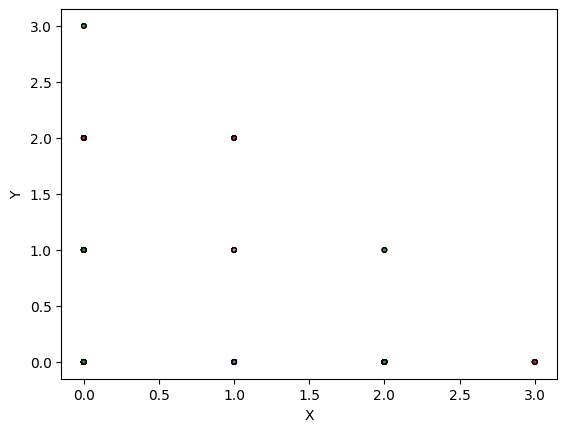

In [65]:
colors = {0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728",4: "#9467bd",5: "#8c564b",6: "#e377c2",7: "#7f7f7f"}
y_train_col = list(map(colors.get, y_train))
fig = plt.figure()
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    color=y_train_col,
    marker='o',
    s=10,
    edgecolor='k'
)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [68]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba_max = np.max(y_pred_proba, axis=1)
mapie_score = MapieClassifier(estimator=clf, cv="prefit", method="score")
mapie_score.fit(X_cal, y_cal)
alpha = [0.2, 0.1, 0.05]
y_pred_score, y_ps_score = mapie_score.predict(X_test, alpha=alpha)

In [69]:
def plot_scores(n, alphas, scores, quantiles):
    colors ={0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728",4: "#9467bd",5: "#8c564b",6: "#e377c2",7: "#7f7f7f"}
    plt.figure(figsize=(7, 5))
    plt.hist(scores, bins="auto")
    for i, quantile in enumerate(quantiles):
        plt.vlines(
            x=quantile,
            ymin=0,
            ymax=400,
            color=colors[i],
            ls="dashed",
            label=f"alpha = {alphas[i]}"
        )
    plt.title("Distribution of scores")
    plt.legend(loc='upper left')
    plt.xlabel("Scores")
    plt.ylabel("Count")
    plt.show()

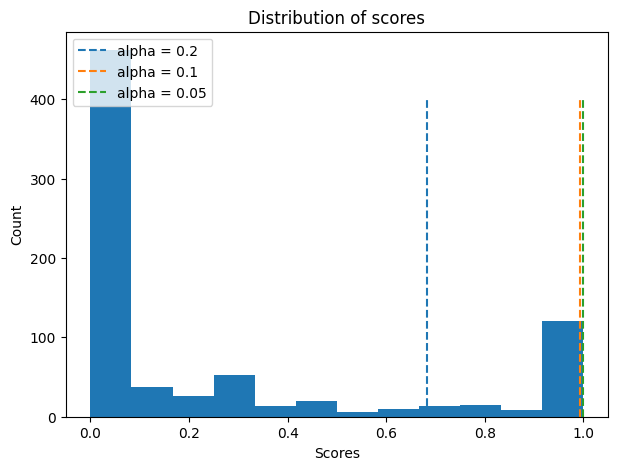

In [70]:
scores = mapie_score.conformity_scores_
n = len(mapie_score.conformity_scores_)
quantiles = mapie_score.quantiles_
plot_scores(n, alpha, scores, quantiles)

<ipython-input-72-f1d34b396aec>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('Purples', 10)


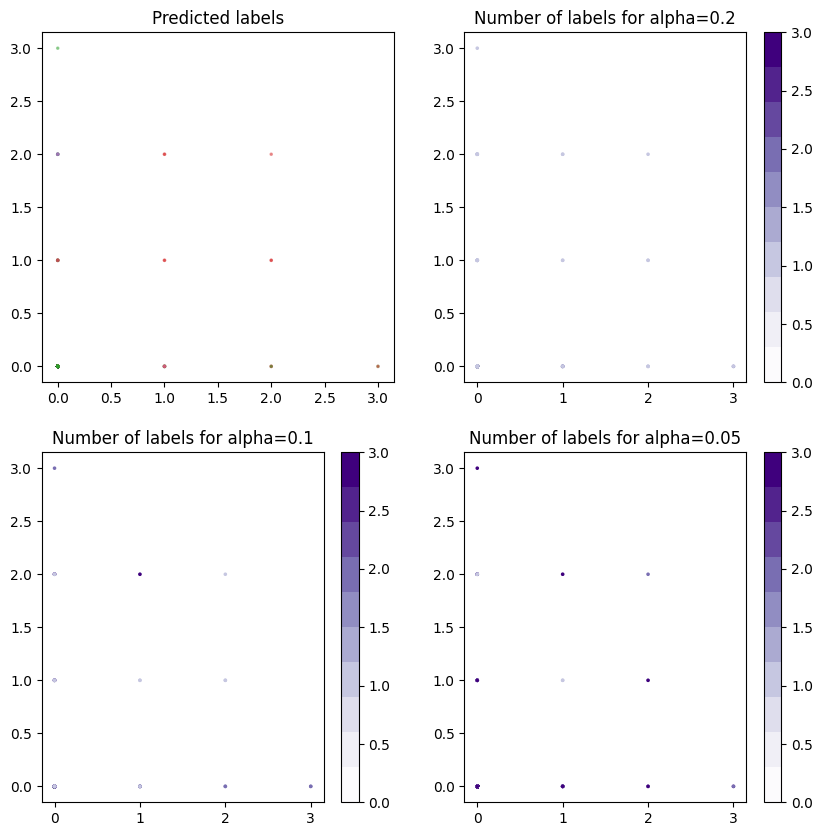

In [72]:

def plot_results(alphas, X, y_pred, y_ps):
    tab10 = plt.cm.get_cmap('Purples', 10)
    colors ={0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728",4: "#9467bd",5: "#8c564b",6: "#e377c2",7: "#7f7f7f"}
    y_pred_col = list(map(colors.get, y_pred))
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 10))
    axs = {0: ax1, 1: ax2, 2:  ax3, 3: ax4}
    axs[0].scatter(
        X[:, 0],
        X[:, 1],
        color=y_pred_col,
        marker='.',
        s=10,
        alpha=0.4
    )
    axs[0].set_title("Predicted labels")
    for i, alpha in enumerate(alphas):
        y_pi_sums = y_ps[:, :, i].sum(axis=1)
        num_labels = axs[i+1].scatter(
            X[:, 0],
            X[:, 1],
            c=y_pi_sums,
            marker='.',
            s=10,
            alpha=1,
            cmap=tab10,
            vmin=0,
            vmax=3
        )
        plt.colorbar(num_labels, ax=axs[i+1])
        axs[i+1].set_title(f"Number of labels for alpha={alpha}")
    plt.show()


plot_results(alpha, X_test, y_pred_score, y_ps_score)

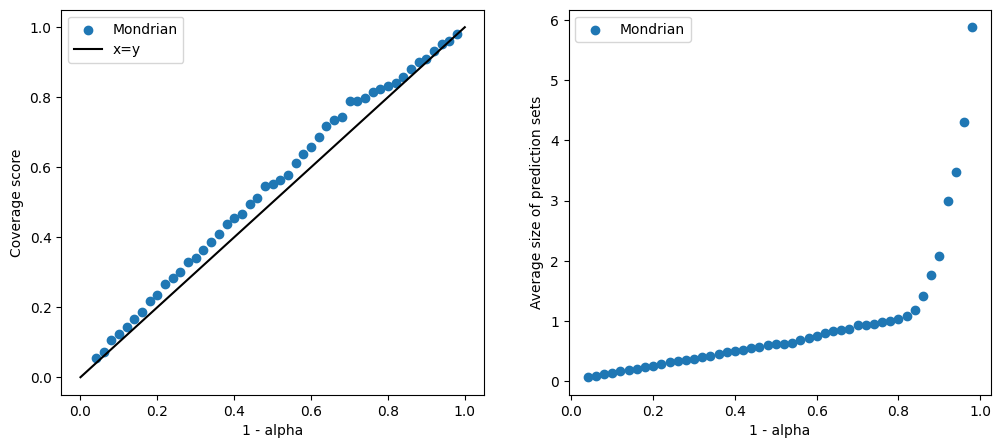

In [73]:
alpha2 = np.arange(0.02, 0.98, 0.02)
_, y_ps_score2 = mapie_score.predict(X_test, alpha=alpha2)
coverages_score = [
    classification_coverage_score(y_test, y_ps_score2[:, :, i])
    for i, _ in enumerate(alpha2)
]
widths_score = [
    classification_mean_width_score(y_ps_score2[:, :, i])
    for i, _ in enumerate(alpha2)
]


def plot_coverages_widths(alpha, coverage, width, method):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].scatter(1 - alpha, coverage, label=method)
    axs[0].set_xlabel("1 - alpha")
    axs[0].set_ylabel("Coverage score")
    axs[0].plot([0, 1], [0, 1], label="x=y", color="black")
    axs[0].legend()
    axs[1].scatter(1 - alpha, width, label=method)
    axs[1].set_xlabel("1 - alpha")
    axs[1].set_ylabel("Average size of prediction sets")
    axs[1].legend()
    plt.show()


plot_coverages_widths(alpha2, coverages_score, widths_score, "Mondrian")

In [76]:
from typing import Any, Dict, List, Optional, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from typing_extensions import TypedDict

from mapie._typing import NDArray
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,
                           classification_mean_width_score)

In [78]:
kf = KFold(n_splits=5, shuffle=True)
clfs, mapies, y_preds, y_ps_mapies = {}, {}, {}, {}
methods = ["score"]
alpha = np.arange(0.01, 1, 0.01)
for method in methods:
    clfs_, mapies_, y_preds_, y_ps_mapies_ = {}, {}, {}, {}
    for fold, (train_index, calib_index) in enumerate(kf.split(X_train)):
        clf = GaussianNB().fit(X_train[train_index], y_train[train_index])
        clfs_[fold] = clf
        mapie = MapieClassifier(estimator=clf, cv="prefit", method=method)
        mapie.fit(X_train[calib_index], y_train[calib_index])
        mapies_[fold] = mapie
        y_pred_mapie, y_ps_mapie = mapie.predict(
            X_test, alpha=alpha, include_last_label="randomized"
        )
        y_preds_[fold], y_ps_mapies_[fold] = y_pred_mapie, y_ps_mapie
    clfs[method], mapies[method], y_preds[method], y_ps_mapies[method] = (
        clfs_, mapies_, y_preds_, y_ps_mapies_
    )

In [79]:
def plot_results(
        mapies: Dict[int, Any],
        X_test: NDArray,
        X_test2: NDArray,
        y_test2: NDArray,
        alpha: float,
        method: str
) -> None:
    tab10 = plt.cm.get_cmap('Purples', 4)
    fig, axs = plt.subplots(1, len(mapies), figsize=(20, 4))
    for i, (_, mapie) in enumerate(mapies.items()):
        y_pi_sums = mapie.predict(
            X_test,
            alpha=alpha,
            include_last_label=True
        )[1][:, :, 0].sum(axis=1)
        axs[i].scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_pi_sums,
            marker='.',
            s=10,
            alpha=1,
            cmap=tab10,
            vmin=0,
            vmax=3
        )
        coverage = classification_coverage_score(
            y_test2, mapie.predict(X_test2, alpha=alpha)[1][:, :, 0]
        )
        axs[i].set_title(f"coverage = {coverage:.3f}")
    plt.suptitle(
        "Number of labels in prediction sets "
        f"for the {method} method"
    )
    plt.show()

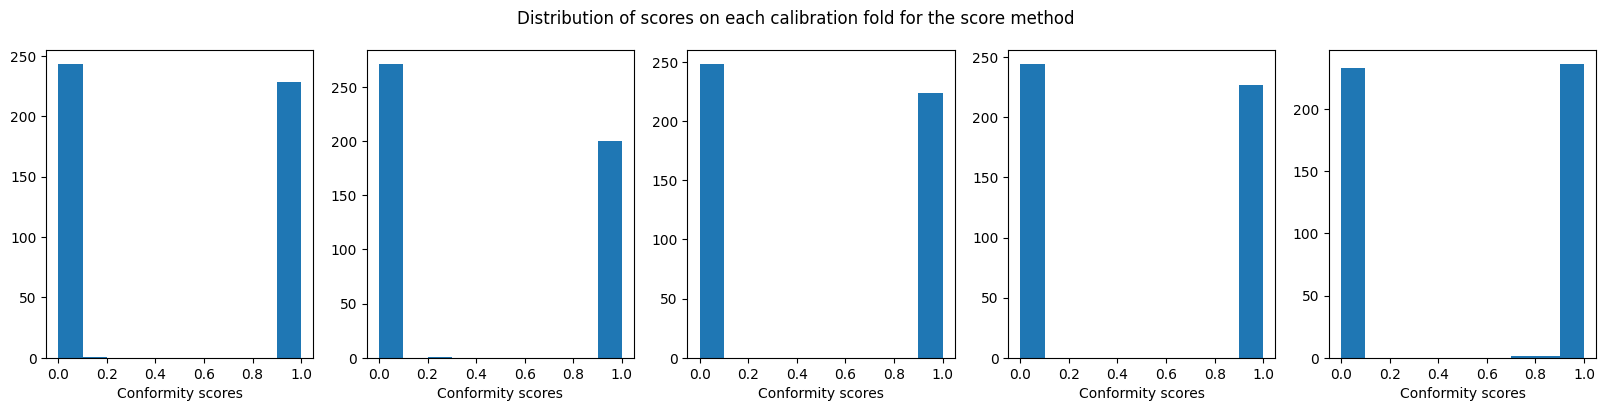

In [82]:
fig, axs = plt.subplots(1, len(mapies["score"]), figsize=(20, 4))
for i, (key, mapie) in enumerate(mapies["score"].items()):
    axs[i].set_xlabel("Conformity scores")
    axs[i].hist(mapie.conformity_scores_)
    #axs[i].axvline(mapie.quantiles_[1], ls="--", color="k")
    #axs[i].set_title(f"split={key}\nquantile={mapie.quantiles_[9]:.3f}")
plt.suptitle(
    "Distribution of scores on each calibration fold for the "
    f"{methods[0]} method"
)
plt.show()


In [83]:
def plot_results(
        mapies: Dict[int, Any],
        X_test: NDArray,
        X_test2: NDArray,
        y_test2: NDArray,
        alpha: float,
        method: str
) -> None:
    tab10 = plt.cm.get_cmap('Purples', 4)
    fig, axs = plt.subplots(1, len(mapies), figsize=(20, 4))
    for i, (_, mapie) in enumerate(mapies.items()):
        y_pi_sums = mapie.predict(
            X_test,
            alpha=alpha,
            include_last_label=True
        )[1][:, :, 0].sum(axis=1)
        axs[i].scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_pi_sums,
            marker='.',
            s=10,
            alpha=1,
            cmap=tab10,
            vmin=0,
            vmax=3
        )
        coverage = classification_coverage_score(
            y_test2, mapie.predict(X_test2, alpha=alpha)[1][:, :, 0]
        )
        axs[i].set_title(f"coverage = {coverage:.3f}")
    plt.suptitle(
        "Number of labels in prediction sets "
        f"for the {method} method"
    )
    plt.show()

<ipython-input-83-c939e6f62cf0>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('Purples', 4)


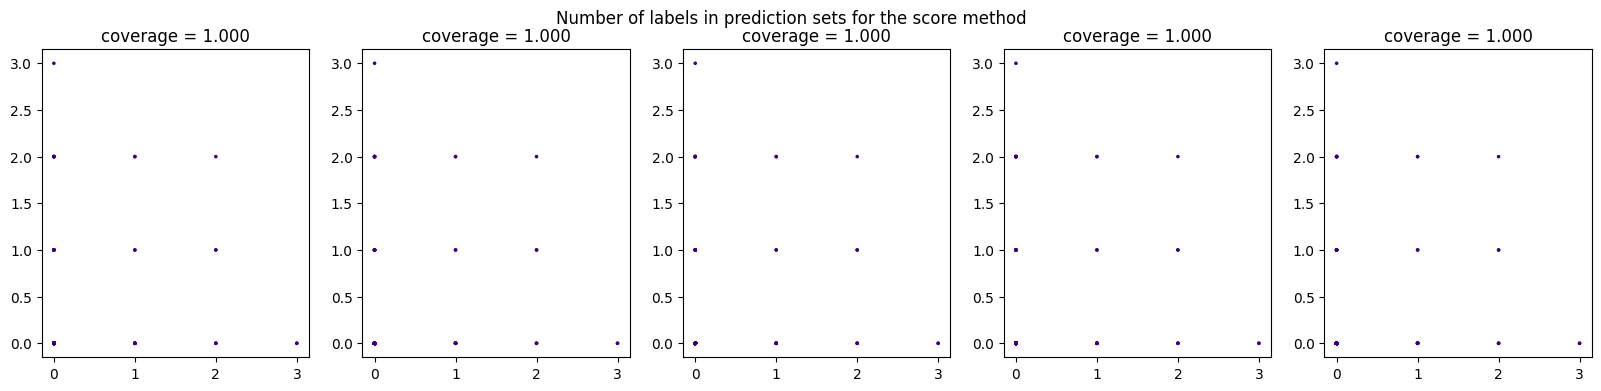

In [84]:
plot_results(
    mapies["score"],
    X_test,
    X_test,
    y_test,
    alpha[9],
    "score"
)



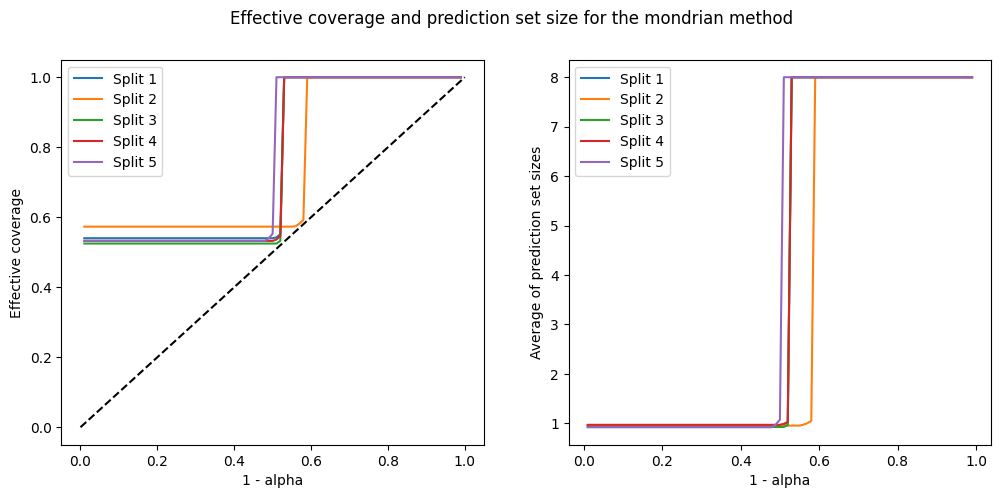

In [85]:
def plot_coverage_width(
        alpha: NDArray,
        coverages: List[NDArray],
        widths: List[NDArray],
        method: str,
        comp: str = "split"
) -> None:
    if comp == "split":
        legends = [f"Split {i + 1}" for i, _ in enumerate(coverages)]
    else:
        legends = ["Mean", "Crossval"]
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].set_xlabel("1 - alpha")
    axes[0].set_ylabel("Effective coverage")
    for i, coverage in enumerate(coverages):
        axes[0].plot(1 - alpha, coverage, label=legends[i])
    axes[0].plot([0, 1], [0, 1], ls="--", color="k")
    axes[0].legend()
    axes[1].set_xlabel("1 - alpha")
    axes[1].set_ylabel("Average of prediction set sizes")
    for i, width in enumerate(widths):
        axes[1].plot(1 - alpha, width, label=legends[i])
    axes[1].legend()
    plt.suptitle(
        "Effective coverage and prediction set size "
        f"for the {method} method"
    )
    plt.show()


split_coverages = np.array(
    [
        [
            [
                classification_coverage_score(
                    y_test, y_ps[:, :, ia]
                ) for ia, _ in enumerate(alpha)]
            for _, y_ps in y_ps2.items()
        ] for _, y_ps2 in y_ps_mapies.items()
    ]
)

split_widths = np.array(
    [
        [
            [
                classification_mean_width_score(y_ps[:, :, ia])
                for ia, _ in enumerate(alpha)
            ]
            for _, y_ps in y_ps2.items()
        ] for _, y_ps2 in y_ps_mapies.items()
    ]
)

plot_coverage_width(
    alpha, split_coverages[0], split_widths[0], "mondrian"
)



#RAPS

In [87]:

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
model=clf
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
X_calib=X_cal
y_calib=y_cal
cp.fit(X_calib, y_calib)
X_new=X_test
y_pred1, y_set = cp.predict(X_new, alpha=0.03)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))


#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.05)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.1)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.2)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.3)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.4)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.5)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.6)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.7)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.8)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'mondrian', raps', 'cumulated_raps', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="raps")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.9)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))


    0   1    2    3   4   5   6   7
0  81   2    0    1   8   0   0   0
1   0  73    1    2   1   0   0   0
2   0   0  237    0   0   1   0   0
3   0   0    0  116   2   3   1   0
4   0   0    0    0  81   6   0   0
5   0   0    0    0   0  69   0   0
6   0   0    0    0   0   0  49   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5   6   7
0  81   2    0    1   8   0   0   0
1   0  73    1    2   1   0   0   0
2   0   0  237    0   0   1   0   0
3   0   0    0  116   2   3   1   0
4   0   0    0    0  81   6   0   0
5   0   0    0    0   0  69   0   0
6   0   0    0    0   0   0  49   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5   6   7
0  81   2    0    1   8   0   0   0
1   0  73    1    2   1   0   0   0
2   0   0  237    0   0   1   0   0
3   0   0    0  116   2   3   1   0
4   0   0    0    0  81   6   0   0
5   0   0    0    0   0  69   0   0
6   0   0    0    0   0   0  49   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5 

#NAIVE

In [89]:
#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.01)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))


#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.05)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.1)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.2)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.3)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.4)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.5)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.6)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.7)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.8)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'naive', naive', 'cumulated_naive', 'naive', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="naive")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.9)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))


    0   1    2    3   4   5   6   7
0  81   0    0    0   0   0   0   0
1   0  75    0    0   1   0   0   0
2   0   0  238    0   0   0   0   0
3   0   0    0  119   0   1   0   0
4   0   0    0    0  91   0   0   0
5   0   0    0    0   0  78   0   0
6   0   0    0    0   0   0  50   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5   6   7
0  81   0    0    0   0   0   0   0
1   0  75    0    0   0   0   0   0
2   0   0  238    0   0   0   0   0
3   0   0    0  119   0   1   0   0
4   0   0    0    0  92   0   0   0
5   0   0    0    0   0  78   0   0
6   0   0    0    0   0   0  50   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5   6   7
0  81   0    0    0   0   0   0   0
1   0  75    0    0   0   0   0   0
2   0   0  238    0   0   0   0   0
3   0   0    0  119   0   1   0   0
4   0   0    0    0  92   0   0   0
5   0   0    0    0   0  78   0   0
6   0   0    0    0   0   0  50   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5 

#Cumulated Score

In [90]:
#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.01)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))


#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.05)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.1)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.2)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.3)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.4)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.5)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.6)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.7)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.8)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'cumulated_score', cumulated_score', 'cumulated_cumulated_score', 'cumulated_score', 'cumulated_score' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="cumulated_score")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.9)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))


    0   1    2    3   4   5   6   7
0  81   2    0    1   8   0   0   0
1   0  73    1    2   1   0   0   0
2   0   0  237    0   0   1   0   0
3   0   0    0  116   2   3   1   0
4   0   0    0    0  81   6   0   0
5   0   0    0    0   0  69   0   0
6   0   0    0    0   0   0  49   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5   6   7
0  81   2    0    1   4   0   0   0
1   0  73    1    2   1   0   0   0
2   0   0  237    0   0   1   0   0
3   0   0    0  116   2   2   0   0
4   0   0    0    0  85   6   0   0
5   0   0    0    0   0  70   0   0
6   0   0    0    0   0   0  50   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5   6   7
0  81   2    0    1   4   0   0   0
1   0  73    1    2   1   0   0   0
2   0   0  237    0   0   1   0   0
3   0   0    0  116   2   2   0   0
4   0   0    0    0  85   6   0   0
5   0   0    0    0   0  70   0   0
6   0   0    0    0   0   0  50   0
7   0   0    0    0   0   0   0  53
    0   1    2    3   4   5 

#Top-K

In [91]:
#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.01)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))


#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.05)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.1)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.2)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.3)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.4)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.5)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.6)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.7)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.8)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

#Allowed values are 'top_k', top_k', 'cumulated_top_k', 'top_k', 'top_k' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="top_k")
cp.fit(X_calib, y_calib)
y_pred1, y_set = cp.predict(X_new, alpha=0.9)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))


    0   1    2    3   4   5   6   7
0  81  75  238  119  92  79  50  53
1   0   0    0    0   0   0   0   0
2   0   0    0    0   0   0   0   0
3   0   0    0    0   0   0   0   0
4   0   0    0    0   0   0   0   0
5   0   0    0    0   0   0   0   0
6   0   0    0    0   0   0   0   0
7   0   0    0    0   0   0   0   0
    0   1    2    3   4   5   6   7
0  81  75  238  119  92  79  50  53
1   0   0    0    0   0   0   0   0
2   0   0    0    0   0   0   0   0
3   0   0    0    0   0   0   0   0
4   0   0    0    0   0   0   0   0
5   0   0    0    0   0   0   0   0
6   0   0    0    0   0   0   0   0
7   0   0    0    0   0   0   0   0
    0   1    2    3   4   5   6   7
0  81  75  238  119  92  79  50  53
1   0   0    0    0   0   0   0   0
2   0   0    0    0   0   0   0   0
3   0   0    0    0   0   0   0   0
4   0   0    0    0   0   0   0   0
5   0   0    0    0   0   0   0   0
6   0   0    0    0   0   0   0   0
7   0   0    0    0   0   0   0   0
    0   1    2    3   4   5 

#Using Non Conformist + Classifier

In [41]:
!pip install nonconformist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nonconformist: filename=nonconformist-2.1.0-py3-none-any.whl size=17841 sha256=89e1afccc2b0d0fae90b70aae0d161153276ab6e166d53c58d1ba440bc5b99d4
  Stored in directory: /root/.cache/pip/wheels/ce/2f/2f/dde1c910878402b5a67e999c3c3b0758d257466ebf093b6cc7
Successfully built nonconformist


In [44]:
from nonconformist.evaluation import class_mean_errors

In [45]:
from nonconformist.nc import ClassifierNc

In [46]:
from nonconformist.cp import IcpClassifier
from nonconformist.nc import NcFactory
from nonconformist.base import ClassifierAdapter
from nonconformist.nc import ClassifierNc, MarginErrFunc

In [47]:
from tabulate import tabulate   # Import tabulate function for tabular formatting

In [48]:
# Divide the data into proper training set, calibration set and test set
X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)

In [49]:
# Create an inductive conformal classifier
icp = IcpClassifier(ClassifierNc(ClassifierAdapter(MultinomialNB()),MarginErrFunc()))
# Fit the ICP using the proper training set
icp.fit(X_train, y_train)
# Calibrate the ICP using the calibration set
icp.calibrate(X_cal, y_cal)

# There are a total of 8 labels

```
0- Cardiovascular/ Pulmonary
1- Consult- History and Phy.
2- Others
3- Gastroenterology
4- General Medicine
5- Neurology
6- Obstetrics/ Gynecology
7- Surgery
```

In [50]:
prediction = icp.predict(X_test, significance=0.1)

predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1].round(3)
credibility = predictions[:, 2].round(3)

y_pred = predictions[:, 0].astype(int)

header = np.array(['c0-label', 'c1-label', 'c2-label','c3-label','c4-label','c5-label','c6-label','c7-label',
                   'c0-value', 'c1-value','c2-value','c3-value','c4-value','c5-value','c6-value','c7-value', 
                   'conf', 'cred', 'y-test','y-pred'])

label_map = {0: 'Cardiovascular/ Pulmonary', 1: 'Consult- History and Phy.', 2: 'Others', 3: 'Gastroenterology', 4: 'General Medicine', 5: 'Neurology', 6: 'Obstetrics/ Gynecology', 7: 'Surgery'}
# Define a function that maps integer labels to categorical names using the label_map
label_mapper = np.vectorize(lambda label: label_map[label])
# Use the label_mapper function to map the integer labels in y to categorical names
prediction_categorical = label_mapper(prediction)
y_label_names = label_mapper(y_pred)

table = np.vstack([prediction_categorical.T, prediction.T, confidence, credibility, y_label_names, y_pred]).T

df = pd.DataFrame(np.vstack([header, table]))
print(df)


                            0                          1   \
0                     c0-label                   c1-label   
1    Consult- History and Phy.  Consult- History and Phy.   
2    Consult- History and Phy.  Consult- History and Phy.   
3    Consult- History and Phy.  Consult- History and Phy.   
4    Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
..                         ...                        ...   
783  Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
784  Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
785  Consult- History and Phy.  Consult- History and Phy.   
786  Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
787  Cardiovascular/ Pulmonary  Consult- History and Phy.   

                            2                          3   \
0                     c2-label                   c3-label   
1    Consult- History and Phy.  Consult- History and Phy.   
2    Consult- History and Phy.  Consult- History and Phy.   
3    Consult- History a

In [51]:
prediction

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [52]:
print(df.to_string(index=False, header=False))

                 c0-label                  c1-label                  c2-label                  c3-label                  c4-label                  c5-label                  c6-label                  c7-label c0-value c1-value c2-value c3-value c4-value c5-value c6-value c7-value  conf  cred                    y-test y-pred
Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy.     True     True     True     True     True     True     True     True 0.814 0.227          Gastroenterology      3
Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy.     True     True     True     True     True     True     True     True 0.863  0.34                    Others      2
Consult- History and Phy.

```
label_map = {0: 'Cardiovascular/ Pulmonary', 1: 'Consult- History and Phy.', 2: 'Others', 3: 'Gastroenterology', 4: 'General Medicine', 5: 'Neurology', 6: 'Obstetrics/ Gynecology', 7: 'Surgery'}

```

In [53]:
cardio_count = 0
consult_count = 0
others_count = 0
gastro_count = 0
genmed_count = 0
neuro_count = 0
gynec_count=0
surgery_count=0

# Loop over each predicted label and update the corresponding counter
for label in y_label_names:
    if label == 'Cardiovascular/ Pulmonary':
        cardio_count += 1
    elif label == 'Consult- History and Phy.':
        consult_count += 1
    elif label == 'Others':
        others_count += 1
    elif label == 'Gastroenterology':
        gastro_count += 1
    elif label == 'General Medicine':
        genmed_count += 1    
    elif label == 'Neurology':
        neuro_count += 1
    elif label == 'Obstetrics/ Gynecology':
        gynec_count += 1
    elif label == 'Surgery':
        surgery_count += 1

# Print the results
print(f'Cardiovascular/ Pulmonary: {cardio_count}')
print(f'Consult- History and Phy.: {consult_count}')
print(f'Others: {others_count}')
print(f'Gastroenterology: {gastro_count}')
print(f'General Medicine: {genmed_count}')
print(f'Neurology: {neuro_count}')
print(f'Obstetrics/ Gynecology count: {gynec_count}')
print(f'Surgery count: {surgery_count}')


Cardiovascular/ Pulmonary: 83
Consult- History and Phy.: 59
Others: 415
Gastroenterology: 61
General Medicine: 35
Neurology: 46
Obstetrics/ Gynecology count: 34
Surgery count: 54


In [54]:
error_rate1 = class_mean_errors(icp.predict(X_test), y_test, significance=0.1)
print('Error rate 1: {}'.format(error_rate1))


error_rate2 = class_mean_errors(icp.predict(X_test), y_test, significance=0.2)
print('Error rate 2: {}'.format(error_rate2))


error_rate3 = class_mean_errors(icp.predict(X_test), y_test, significance=0.6)
print('Error rate 3: {}'.format(error_rate3))



error_rate4 = class_mean_errors(icp.predict(X_test), y_test, significance=0.8)
print('Error rate 4: {}'.format(error_rate4))

Error rate 1: 0.0927573062261754
Error rate 2: 0.19949174078780174
Error rate 3: 0.590851334180432
Error rate 4: 0.7941550190597204


In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# Predict confidence and credibility
predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1]
credibility = predictions[:, 2]


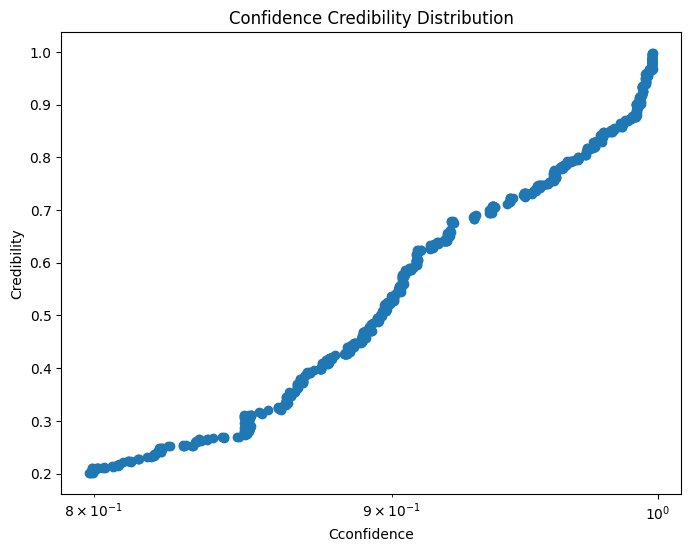

In [56]:
# Plot credibility
plt.figure(figsize=(8, 6))
plt.scatter(confidence,credibility)
plt.xscale("log")

plt.xlabel('Cconfidence')
plt.ylabel('Credibility')
plt.title('Confidence Credibility Distribution')
plt.show()

Create a map with keys being the encoded values and values being the medical speciality

In [57]:
medical_specialty = {
0: 'Cardiovascular/ Pulmonary',
1: 'Consult- History and Phy.',
2: 'Others',
3: 'Gastroenterology',
4: 'General Medicine',
5: 'Neurology',
6: 'Obstetrics/ Gynecology',
7: 'Surgery'
}

In [58]:
# Produce nonconformity scores for the test set
nc_scores = icp.predict(X_test, significance=0.20)

# Obtain a set prediction for the test set
set_prediction = icp.predict(X_test, significance=None)

# Tabulate the nc_scores, set_prediction, and predicted label values side by side
table = []
for i, (nc_score, set_pred) in enumerate(zip(nc_scores, set_prediction)):
    predicted_label = medical_specialty[np.argmax(set_pred)]
    table.append([i+1, nc_score, set_pred, predicted_label])

headers = ['Instance', 'nc_score', 'set_prediction', 'predicted_label']
print(tabulate(table, headers=headers))

  Instance  nc_score                                           set_prediction                                                      predicted_label
----------  -------------------------------------------------  ------------------------------------------------------------------  -------------------------
         1  [False False False  True False False False False]  [0.18670065 0.16657425 0.18114459 0.22618426 0.17088935 0.16772518  Gastroenterology
                                                                0.16673419 0.16684219]
         2  [False False  True False False False False False]  [0.1365078  0.13425201 0.33981075 0.13275495 0.13335644 0.132696    Others
                                                                0.13543539 0.13224446]
         3  [ True False False False False False False False]  [0.2354564  0.14149383 0.1809338  0.14037907 0.14500057 0.13906268  Cardiovascular/ Pulmonary
                                                                0.13976072 0.13